<a href="https://colab.research.google.com/github/MRobalinho/Multispectral_Images/blob/master/Reading_Multispectral_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing SPy

## Reading HSI Data Files
The standard means of opening and accessing a hyperspectral image file with SPy is via the image function, which returns an instance of a SpyFile object.

## The SpyFile Interface¶
SpyFile is the base class for creating objects to read hyperspectral data files. When a SpyFile object is created, it provides an interface to read data from a corresponding file. When an image is opened, the actual object returned will be a subclass of SpyFile (BipFile, BilFile, or BsqFile) corresponding to the interleave of the data within the image file.

http://www.spectralpython.net/fileio.html

27-11-2018

Manuel Robalinho

**SPy Dependencies**
> Dependency	Notes

*   Python 2.6+ or 3.3+	(1)
*   NumPy	Required
*   Pillow or Python Imaging Library (PIL)	Required if displaying or saving images
*   wxPython	(2)
*   matplotlib	Required if rendering raster displays or spectral plots
*   IPython	Required for interactive, non-blocking GUI windows
*   PyOpenGL	(2)


> 



In [1]:
!pip install spectral

    100% |████████████████████████████████| 143kB 6.3MB/s 
  Running setup.py bdist_wheel for spectral ... - \ done
  Stored in directory: /root/.cache/pip/wheels/93/7e/15/a200ebb0b557d54eb396234737f9593ce705ed98a954bf148b
Successfully built spectral


## Installing from the Git source code repository

In [3]:
!git clone https://github.com/spectralpython/spectral.git

Cloning into 'spectral'...
remote: Enumerating objects: 2954, done.
remote: Total 2954 (delta 0), reused 0 (delta 0), pack-reused 2954
Receiving objects: 100% (2954/2954), 964.01 KiB | 17.21 MiB/s, done.
Resolving deltas: 100% (2069/2069), done.


## Reading HSI Data Files

In [0]:
from spectral import *

In [9]:
# Readind (upload) Files
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 92AV3C.lan to 92AV3C.lan
Saving 92AV3C.spc to 92AV3C (1).spc
Saving 92AV3GT.GIS to 92AV3GT.GIS
User uploaded file "92AV3C.lan" with length 9251128 bytes
User uploaded file "92AV3C.spc" with length 10976 bytes
User uploaded file "92AV3GT.GIS" with length 21153 bytes


In [0]:
# Read file
img = open_image('92AV3C.lan')

In [11]:
# Obtain file type
img.__class__

spectral.io.bilfile.BilFile

In [13]:
print(img)

	Data Source:   '././92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16


In [14]:
# shape image
img.shape

(145, 145, 220)

## Image Data Display

In [0]:
# Image Data Display¶
from spectral import *

In [0]:
img = open_image('92AV3C.lan')

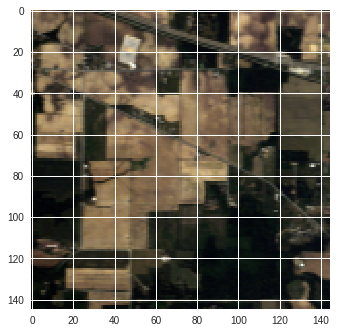

In [19]:
# RGB data limits for a displayed image can be printed from the __str__ method of the ImageView object:
# By default, imshow function applies a linear histogram stretch of the RGB display data. The the color 
# stretch can be controlled by the stretch, bounds, and stretch_all keyword to the imshow function
# (see get_rgb for the meaning of these keywords). To adjust the color stretch of a displayed image, 
# the set_rgb_options method of the ImageView object can be called.

print(view)

ImageView object:
  Display bands       :  (29, 19, 9)
  Interpolation       :  <default>
  RGB data limits     :
    R: [2054.0, 6317.0]
    G: [2775.0, 7307.0]
    B: [3560.0, 7928.0]



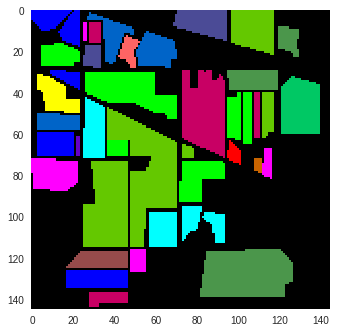

In [20]:
# To display the ground truth image using imshow, set the classes argument in the imshow function:
gt = open_image('92AV3GT.GIS').read_band(0)

view = imshow(classes=gt)

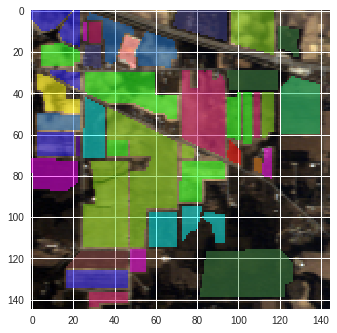

In [21]:
# Setting the display parameters can also be done programatically. For example, to display the image with overlayed class masks, 
# using an alpha transparency of 0.5, type the following commands after calling imshow:

view = imshow(img, (30, 20, 10), classes=gt)

view.set_display_mode('overlay')

view.class_alpha = 0.5

In [0]:
# Saving RGB Image Files
save_rgb('rgb.jpg', img, [29, 19, 9])

In [0]:
# Saving an indexed color image is similar to saving an RGB image; however, save_rgb is unable to determine if the image being saved is a single-band (greyscale) 
# image or an indexed color image.

save_rgb('gt.jpg', gt, colors=spy_colors)

# Spectrum Plots
The image display windows provide a few interactive functions. If you create an image display with imshow (or view) and then double-click on a particular location in the window, a new window will be created with a 2D plot of the spectrum for the pixel that was clicked. It should look something like this:

In [0]:
import spectral.io.aviris as aviris

In [0]:
img.bands = aviris.read_aviris_bands('92AV3C.spc')

In [0]:
import spectral

In [0]:
spectral.settings.WX_GL_DEPTH_SIZE = 16

## N-Dimensional Feature Display¶

In [42]:
data = open_image('92AV3C.lan').load()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """Entry point for launching an IPython kernel.


In [43]:
gt = open_image('92AV3GT.GIS').read_band(0)

pc = principal_components(data)

xdata = pc.transform(data)

w = view_nd(xdata[:,:,:15], classes=gt)

ImportError: ignored